## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df["APPLICATION_TYPE"].value_counts()
threshold = 500
rare_application_types = application_df["APPLICATION_TYPE"].value_counts()[application_df["APPLICATION_TYPE"].value_counts() < threshold].index
application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].apply(lambda x: "Other" if x in rare_application_types else x)
application_df["APPLICATION_TYPE"].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df["APPLICATION_TYPE"].value_counts()[application_df["APPLICATION_TYPE"].value_counts() < cutoff_value].index.tolist()
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df["CLASSIFICATION"].value_counts()
cutoff_value = 1000
classifications_to_replace = application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() < cutoff_value].index.tolist()
classifications_to_replace

for cls in classifications_to_replace:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

application_df["CLASSIFICATION"].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1000
classifications_to_replace = application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts() < cutoff_value].index.tolist()
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, drop_first=True)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27439, 36), (6860, 36), (27439,), (6860,))

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation="relu", input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6783 - loss: 0.6010 - val_accuracy: 0.7203 - val_loss: 0.5663
Epoch 2/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7267 - loss: 0.5570 - val_accuracy: 0.7268 - val_loss: 0.5597
Epoch 3/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7286 - loss: 0.5550 - val_accuracy: 0.7248 - val_loss: 0.5597
Epoch 4/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7287 - loss: 0.5526 - val_accuracy: 0.7248 - val_loss: 0.5608
Epoch 5/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7274 - loss: 0.5550 - val_accuracy: 0.7271 - val_loss: 0.5570
Epoch 6/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7357 - loss: 0.5435 - val_accuracy: 0.7274 - val_loss: 0.5574
Epoch 7/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7360 - loss: 0.5452 - val_accuracy: 0.7262 - val_loss: 0.5572
Epoch 8/50
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7302 - loss: 0.5483 - val_accuracy: 0.

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - 3ms/step - accuracy: 0.7252 - loss: 0.5589
Loss: 0.5589138865470886, Accuracy: 0.725218653678894


In [17]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

In [18]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [20]:

url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
application_df = pd.read_csv(url)

application_df = application_df.drop(columns=["EIN", "NAME"])

application_df = pd.get_dummies(application_df, drop_first=True)

y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=["IS_SUCCESSFUL"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature Shape: {X_train.shape}, Target Shape: {y_train.shape}")
print(f"Training Set: {X_train_scaled.shape}, Testing Set: {X_test_scaled.shape}")

Feature Shape: (27439, 109), Target Shape: (27439,)
Training Set: (27439, 109), Testing Set: (6860, 109)


In [21]:
# Define the optimized neural network
optimized_nn = Sequential()

# First hidden layer with increased neurons
optimized_nn.add(Dense(units=128, activation="relu", input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
optimized_nn.add(Dense(units=64, activation="relu"))

# Third hidden layer
optimized_nn.add(Dense(units=32, activation="relu"))

# Output layer with sigmoid activation (for binary classification)
optimized_nn.add(Dense(units=1, activation="sigmoid"))

# Compile the model with an adjusted learning rate
optimized_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                     loss="binary_crossentropy", 
                     metrics=["accuracy"])


optimized_nn.summary()

C:\Users\aslat\.anaconda\.anacondaredo\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          14,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,449 (95.50 KB)

 Trainable params: 24,449 (95.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Define a checkpoint callback to save the model every 5 epochs
checkpoint_cb = ModelCheckpoint(filepath="AlphabetSoupCharity_Optimization.h5", 
                                save_best_only=True, 
                                monitor="val_loss", 
                                mode="min", 
                                verbose=1)

# Train the model
history = optimized_nn.fit(X_train_scaled, y_train, 
                           epochs=100, 
                           batch_size=32, 
                           validation_data=(X_test_scaled, y_test), 
                           callbacks=[checkpoint_cb])

Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.5907
Epoch 1: val_loss improved from inf to 0.56412, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7024 - loss: 0.5907 - val_accuracy: 0.7235 - val_loss: 0.5641
Epoch 2/100
857/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7287 - loss: 0.5539
Epoch 2: val_loss improved from 0.56412 to 0.55730, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7287 - loss: 0.5539 - val_accuracy: 0.7271 - val_loss: 0.5573
Epoch 3/100
855/858 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5524
Epoch 3: val_loss did not improve from 0.55730
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7259 - loss: 0.5524 - val_accuracy: 0.7248 - val_loss: 0.5584
Epoch 4/100
845/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.5458
Epoch 4: val_loss improved from 0.55730 to 0.55698, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7337 - loss: 0.5458 - val_accuracy: 0.7252 - val_loss: 0.5570
Epoch 5/100
853/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.5455
Epoch 5: val_loss improved from 0.55698 to 0.55538, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7334 - loss: 0.5455 - val_accuracy: 0.7302 - val_loss: 0.5554
Epoch 6/100
845/858 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5403
Epoch 6: val_loss improved from 0.55538 to 0.55459, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7359 - loss: 0.5404 - val_accuracy: 0.7313 - val_loss: 0.5546
Epoch 7/100
848/858 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.5403
Epoch 7: val_loss did not improve from 0.55459
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7394 - loss: 0.5403 - val_accuracy: 0.7289 - val_loss: 0.5565
Epoch 8/100
844/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5393
Epoch 8: val_loss did not improve from 0.55459
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7355 - loss: 0.5394 - val_accuracy: 0.7276 - val_loss: 0.5558
Epoch 9/100
847/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7373 - loss: 0.5392
Epoch 9: val_loss did not improve from 0.55459
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7373 - loss: 0.5392 - val_accuracy: 0.7257 - val_loss: 0.5547
Epoch 10/100
856/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7399 - loss: 0.5391
Epoch 10: val_loss did not improve from 0.

858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7400 - loss: 0.5382 - val_accuracy: 0.7313 - val_loss: 0.5537
Epoch 14/100
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5368
Epoch 14: val_loss improved from 0.55371 to 0.55365, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7359 - loss: 0.5368 - val_accuracy: 0.7319 - val_loss: 0.5537
Epoch 15/100
853/858 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.5390
Epoch 15: val_loss improved from 0.55365 to 0.55323, saving model to AlphabetSoupCharity_Optimization.h5


858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7375 - loss: 0.5390 - val_accuracy: 0.7305 - val_loss: 0.5532
Epoch 16/100
843/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5342
Epoch 16: val_loss did not improve from 0.55323
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7418 - loss: 0.5343 - val_accuracy: 0.7306 - val_loss: 0.5558
Epoch 17/100
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.5410
Epoch 17: val_loss did not improve from 0.55323
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7351 - loss: 0.5410 - val_accuracy: 0.7296 - val_loss: 0.5541
Epoch 18/100
844/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.5405
Epoch 18: val_loss did not improve from 0.55323
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7352 - loss: 0.5405 - val_accuracy: 0.7313 - val_loss: 0.5535
Epoch 19/100
837/858 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7408 - loss: 0.5307
Epoch 19: val_loss did not improve f

In [23]:
optimized_nn.save("AlphabetSoupCharity_Optimization.h5")
print("Model saved successfully as AlphabetSoupCharity_Optimization.h5")

Model saved successfully as AlphabetSoupCharity_Optimization.h5


In [25]:
import matplotlib.pyplot as plt

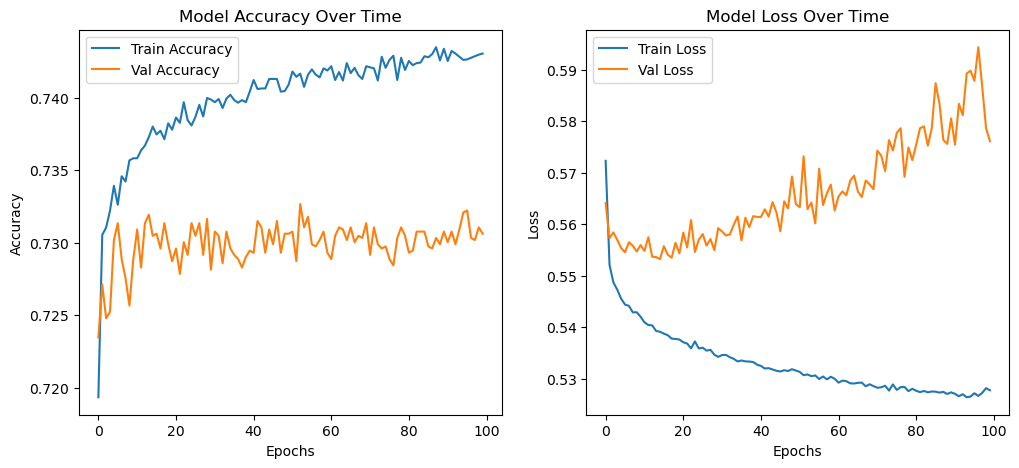

In [26]:

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Time")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Time")
plt.legend()

plt.show()


In [27]:

model_loss, model_accuracy = optimized_nn.evaluate(X_test_scaled, y_test, verbose=2)


print(f"Optimized Model Loss: {model_loss:.4f}")
print(f"Optimized Model Accuracy: {model_accuracy:.4%}")

215/215 - 0s - 2ms/step - accuracy: 0.7306 - loss: 0.5762
Optimized Model Loss: 0.5762
Optimized Model Accuracy: 73.0612%
